In [1]:
import pandas as pd
import numpy as np
import glob
import os

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
path_files = r'./tirages/*.csv'

In [3]:
all_files = glob.glob(path_files)





#filename = all_files[0]

df_list = []

for filename in all_files:
    df = pd.read_csv(filename, sep=';', parse_dates=['date_de_tirage'], dayfirst=True)
    
    df = df[["date_de_tirage", "boule_1", "boule_2", "boule_3", "boule_4", "boule_5", "numero_chance"]]
    
    df.rename(columns={
        'date_de_tirage': 'date_tirage',
        'boule_1': 'num0',
        'boule_2':'num1', 
        "boule_3": "num2", 
        "boule_4": "num3", 
        "boule_5": "num4", 
        "numero_chance": "chance"},inplace=True)
    print(df.shape)
    df_list.append(df)
    #break;

df = pd.concat(df_list)

# placer le dernier tirage en dernière position
df.sort_values('date_tirage', ascending = True, inplace=True)
df.shape

(4858, 7)
(310, 7)
(107, 7)
(455, 7)
(1317, 7)


(7047, 7)

In [4]:
df.head()

,date_tirage,num0,num1,num2,num3,num4,chance
4857,1976-05-19,31,15,33,27,36,34
4856,1976-06-03,10,26,42,1,4,31
4855,1976-06-10,44,16,47,10,15,27
4854,1976-06-16,2,3,35,13,1,49
4853,1976-06-23,30,22,11,9,23,49


In [5]:
df.tail()

,date_tirage,num0,num1,num2,num3,num4,chance
4,2022-09-19,5,7,44,15,33,1
3,2022-09-21,3,12,22,9,37,10
2,2022-09-24,25,6,32,7,4,10
1,2022-09-26,29,49,35,18,39,1
0,2022-09-28,12,39,26,14,29,10


In [6]:
df = df[["num0", "num1", "num2", "num3", "num4", "chance"]]
df.head()

,num0,num1,num2,num3,num4,chance
4857,31,15,33,27,36,34
4856,10,26,42,1,4,31
4855,44,16,47,10,15,27
4854,2,3,35,13,1,49
4853,30,22,11,9,23,49


https://github.com/berba1995/Deep_Learning_et_le_Hasard/blob/main/DEEP_LEARNING_ET_LE_HASARD.ipynb

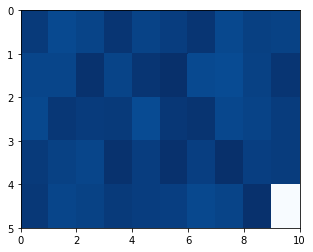

In [7]:
#fonction de vérification de nombres en dessous d'une certaine valeur pour les 5 premiers numéros, sauf celui de chance
def is_under(data, number):
    return ((data['num0'] <= number).astype(int) + 
            (data['num1'] <= number).astype(int) +
            (data['num2'] <= number).astype(int) +
            (data['num3'] <= number).astype(int) +
            (data['num4'] <= number).astype(int))

#fonction de vérification de nombres pairs pour les 5 premiers numéros sauf celui de chance
def is_pair(data):
    return ((data['num0'].isin(pairs)).astype(int) + 
            (data['num1'].isin(pairs)).astype(int) +
            (data['num2'].isin(pairs)).astype(int) +
            (data['num3'].isin(pairs)).astype(int) +
            (data['num4'].isin(pairs)).astype(int))

#fonction de vérification de nombres impairs pour les 5 premiers numéros sauf celui de chance
def is_impair(data):
    return ((data['num0'].isin(impairs)).astype(int) + 
            (data['num1'].isin(impairs)).astype(int) +
            (data['num2'].isin(impairs)).astype(int) +
            (data['num3'].isin(impairs)).astype(int) +
            (data['num4'].isin(impairs)).astype(int))

#fonction de vérification de nombres pairs pour le numéro de chance
def is_pair_etoile(data):
    return (data['chance'].isin(pairs)).astype(int)

#fonction de vérification de nombres impairs pour le numéro de chance
def is_impair_etoile(data):
    return (data['chance'].isin(impairs)).astype(int)

#liste de nombres pairs et impairs
pairs = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
impairs = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]

#Fonction de calcul de la somme de la différence au carré des 5 premiers numéros, sauf celui de chance
def sum_diff(data):
    return ((data['num1'] - data['num0'])**2 + 
            (data['num2'] - data['num1'])**2 +
            (data['num3'] - data['num2'])**2 +
            (data['num4'] - data['num3'])**2)


# Calcul de la fréquence de tirage de chaque numéro
freqs = []
for val in range(50):
    count = ( (df['num0'] == val+1).sum() +
              (df['num1'] == val+1).sum() +
              (df['num2'] == val+1).sum() +
              (df['num3'] == val+1).sum() +
              (df['num4'] == val+1).sum() )
    freqs.append(count)
ax = plt.gca() ;  ax.invert_yaxis()
plt.gcf().set_size_inches(5, 4)
heatmap = plt.pcolor(np.reshape(np.array(freqs), (5, 10)), cmap=plt.cm.Blues)

def freq_val(data, column):
    tab = data[column].values.tolist()
    freqs = []
    pos = 1
    for e in tab:
        freqs.append(tab[0:pos].count(e))
        pos = pos + 1
    return freqs



#df['sum'] = ((df.num0 + df.num1 + df.num2 + df.num3 + df.num4 + df.chance ) >185).astype(int)


In [8]:
#ajout de la difference entre les numéros(A explorer ASAp)
#for i in range(4):
    #print(i,i+1)
    #df['diff_{}'.format(i)]=df['num{}'.format(i+1)]-df['num{}'.format(i)]
#application des fonctions sur le dataframe
df['freq_num0'] = freq_val(df, 'num0')
df['freq_num1'] = freq_val(df, 'num1')
df['freq_num2'] = freq_val(df, 'num2')
df['freq_num3'] = freq_val(df, 'num3')
df['freq_num4'] = freq_val(df, 'num4')
df['freq_chance'] = freq_val(df, 'chance')#calcul des frequences 
df['sum_diff'] = sum_diff(df)#somme de la différence au carré entre chaque couple de numéros successifs dans le tirage
df['pair_chance'] = is_pair_etoile(df)
df['impair_chance'] = is_impair_etoile(df)
df['pair'] = is_pair(df)
df['impair'] = is_impair(df)#verification de nombre pair et impair
df['is_under_24'] = is_under(df, 24)  # Les numeros en dessous de 24 
df['is_under_40'] = is_under(df, 40)# Les numeros en dessous de 40 
df.head(6)

,num0,num1,num2,num3,num4,chance,freq_num0,freq_num1,freq_num2,freq_num3,freq_num4,freq_chance,sum_diff,pair_chance,impair_chance,pair,impair,is_under_24,is_under_40
4857,31,15,33,27,36,34,1,1,1,1,1,1,697,1,0,1,4,1,5
4856,10,26,42,1,4,31,1,1,1,1,1,1,2202,0,1,4,1,3,4
4855,44,16,47,10,15,27,1,1,1,1,1,1,3139,0,1,3,2,3,3
4854,2,3,35,13,1,49,1,1,1,1,1,1,1653,0,1,1,4,4,5
4853,30,22,11,9,23,49,1,1,1,1,1,2,385,0,1,2,3,4,5
4852,10,17,25,35,5,1,2,1,1,1,1,1,1113,0,1,1,4,3,5


In [ ]:
df.head(13)

In [9]:
#Params du modèle
nb_label_feature=6

window_length =12 #12 
number_of_features = df.shape[1]

In [10]:
# Fonction de formatage des données en entrée du modèle
def loto_dataset(df, window_length,nb_label_feature, scaled = True):
    number_of_rows = df.shape[0]   #taille du dataset number_of_features
    number_of_features = df.shape[1]
    
    scaler = None
    
    if scaled:
        scaler = StandardScaler().fit(df.values)
        transformed_dataset = scaler.transform(df.values)
        df = pd.DataFrame(data=transformed_dataset, index=df.index)

    train = np.empty([number_of_rows-window_length, window_length, number_of_features], dtype=float)
    
    label = np.empty([number_of_rows-window_length, nb_label_feature], dtype=float)
    for i in range(0, number_of_rows-window_length):
        train[i] = df.iloc[i:i+window_length, 0: number_of_features]
        label[i] = df.iloc[i+window_length: i+window_length+1, 0:nb_label_feature]
        

        
    return train, label, scaler

In [11]:
X, y, scaler = loto_dataset(df, window_length,nb_label_feature, scaled = True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4713, 12, 19) (2322, 12, 19) (4713, 6) (2322, 6)


In [91]:
from sklearn import metrics
from keras.models import Sequential


from keras.layers import LSTM, Dense, Bidirectional, TimeDistributed, RepeatVector, Flatten
from keras.callbacks import EarlyStopping

In [106]:
units = 100
batch_size = 30
epochs = 1500

window_length = df.shape[0] #12
nb_label_feature=6
number_of_features = df.shape[1]

### Réseau Dense

In [107]:
dense = Sequential()

dense.add(LSTM(units, input_shape=(window_length, number_of_features), return_sequences=True))
dense.add(LSTM(units, dropout=0.1, return_sequences=False))
#ajout de la couche de sortie
dense.add(Dense(nb_label_feature))

es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=100) # acc

In [108]:
#dense.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=['acc'])
dense.compile(loss = 'mae', optimizer = 'adam', metrics = ['accuracy'])   # categorical_crossentropy

In [109]:
training_history_dense = dense.fit(X_train, y_train, validation_split = 0.2, epochs = epochs, batch_size = batch_size, verbose = 1, callbacks=[es])

Epoch 1/1500
126/126 [==============================] - 16s 53ms/step - loss: 0.8311 - accuracy: 0.2398 - val_loss: 0.8413 - val_accuracy: 0.2131
Epoch 2/1500
126/126 [==============================] - 4s 35ms/step - loss: 0.8251 - accuracy: 0.2435 - val_loss: 0.8401 - val_accuracy: 0.2131
Epoch 3/1500
126/126 [==============================] - 4s 33ms/step - loss: 0.8226 - accuracy: 0.2379 - val_loss: 0.8412 - val_accuracy: 0.2153
Epoch 4/1500
126/126 [==============================] - 5s 37ms/step - loss: 0.8205 - accuracy: 0.2549 - val_loss: 0.8466 - val_accuracy: 0.2163
Epoch 5/1500
126/126 [==============================] - 4s 33ms/step - loss: 0.8189 - accuracy: 0.2488 - val_loss: 0.8454 - val_accuracy: 0.2131
Epoch 6/1500
126/126 [==============================] - 5s 37ms/step - loss: 0.8158 - accuracy: 0.2464 - val_loss: 0.8469 - val_accuracy: 0.2121
Epoch 7/1500
126/126 [==============================] - 5s 39ms/step - loss: 0.8122 - accuracy: 0.2629 - val_loss: 0.8465 - val_a

126/126 [==============================] - 8s 62ms/step - loss: 0.2791 - accuracy: 0.7281 - val_loss: 0.9627 - val_accuracy: 0.1983
Epoch 58/1500
126/126 [==============================] - 7s 55ms/step - loss: 0.2752 - accuracy: 0.7289 - val_loss: 0.9667 - val_accuracy: 0.1941
Epoch 59/1500
126/126 [==============================] - 7s 57ms/step - loss: 0.2717 - accuracy: 0.7326 - val_loss: 0.9651 - val_accuracy: 0.2068
Epoch 60/1500
126/126 [==============================] - 6s 48ms/step - loss: 0.2707 - accuracy: 0.7332 - val_loss: 0.9681 - val_accuracy: 0.2036
Epoch 61/1500
126/126 [==============================] - 6s 45ms/step - loss: 0.2651 - accuracy: 0.7340 - val_loss: 0.9650 - val_accuracy: 0.1941
Epoch 62/1500
126/126 [==============================] - 6s 44ms/step - loss: 0.2651 - accuracy: 0.7350 - val_loss: 0.9660 - val_accuracy: 0.1898
Epoch 63/1500
126/126 [==============================] - 8s 64ms/step - loss: 0.2619 - accuracy: 0.7462 - val_loss: 0.9705 - val_accuracy:

126/126 [==============================] - 8s 62ms/step - loss: 0.1941 - accuracy: 0.8199 - val_loss: 0.9628 - val_accuracy: 0.1994
Epoch 114/1500
126/126 [==============================] - 6s 45ms/step - loss: 0.1972 - accuracy: 0.8183 - val_loss: 0.9622 - val_accuracy: 0.2015
Epoch 115/1500
126/126 [==============================] - 7s 54ms/step - loss: 0.1951 - accuracy: 0.8164 - val_loss: 0.9621 - val_accuracy: 0.2078
Epoch 116/1500
126/126 [==============================] - 6s 49ms/step - loss: 0.1937 - accuracy: 0.8175 - val_loss: 0.9638 - val_accuracy: 0.2036
Epoch 117/1500
126/126 [==============================] - 9s 68ms/step - loss: 0.1933 - accuracy: 0.8138 - val_loss: 0.9654 - val_accuracy: 0.2078
Epoch 118/1500
126/126 [==============================] - 6s 50ms/step - loss: 0.1914 - accuracy: 0.8122 - val_loss: 0.9640 - val_accuracy: 0.2110
Epoch 119/1500
126/126 [==============================] - 6s 49ms/step - loss: 0.1914 - accuracy: 0.8172 - val_loss: 0.9619 - val_acc

Epoch 169/1500
126/126 [==============================] - 8s 60ms/step - loss: 0.1676 - accuracy: 0.8424 - val_loss: 0.9488 - val_accuracy: 0.2174
Epoch 170/1500
126/126 [==============================] - 8s 63ms/step - loss: 0.1684 - accuracy: 0.8501 - val_loss: 0.9510 - val_accuracy: 0.2163
Epoch 171/1500
126/126 [==============================] - 7s 55ms/step - loss: 0.1667 - accuracy: 0.8366 - val_loss: 0.9509 - val_accuracy: 0.2280
Epoch 172/1500
126/126 [==============================] - 8s 61ms/step - loss: 0.1671 - accuracy: 0.8411 - val_loss: 0.9501 - val_accuracy: 0.2036
Epoch 173/1500
126/126 [==============================] - 9s 69ms/step - loss: 0.1665 - accuracy: 0.8379 - val_loss: 0.9524 - val_accuracy: 0.2174
Epoch 174/1500
126/126 [==============================] - 8s 66ms/step - loss: 0.1668 - accuracy: 0.8337 - val_loss: 0.9521 - val_accuracy: 0.1994
Epoch 175/1500
126/126 [==============================] - 7s 52ms/step - loss: 0.1661 - accuracy: 0.8443 - val_loss: 0

126/126 [==============================] - 6s 48ms/step - loss: 0.1536 - accuracy: 0.8533 - val_loss: 0.9476 - val_accuracy: 0.2078
Epoch 225/1500
126/126 [==============================] - 6s 49ms/step - loss: 0.1527 - accuracy: 0.8573 - val_loss: 0.9427 - val_accuracy: 0.2174
Epoch 226/1500
126/126 [==============================] - 6s 48ms/step - loss: 0.1537 - accuracy: 0.8432 - val_loss: 0.9465 - val_accuracy: 0.2100
Epoch 227/1500
126/126 [==============================] - 6s 45ms/step - loss: 0.1526 - accuracy: 0.8653 - val_loss: 0.9467 - val_accuracy: 0.2121
Epoch 228/1500
126/126 [==============================] - 6s 45ms/step - loss: 0.1530 - accuracy: 0.8538 - val_loss: 0.9419 - val_accuracy: 0.2121
Epoch 229/1500
126/126 [==============================] - 5s 43ms/step - loss: 0.1535 - accuracy: 0.8544 - val_loss: 0.9404 - val_accuracy: 0.2142
Epoch 230/1500
126/126 [==============================] - 6s 45ms/step - loss: 0.1524 - accuracy: 0.8538 - val_loss: 0.9422 - val_acc

Epoch 280/1500
126/126 [==============================] - 6s 51ms/step - loss: 0.1450 - accuracy: 0.8570 - val_loss: 0.9443 - val_accuracy: 0.1983
Epoch 281/1500
126/126 [==============================] - 7s 58ms/step - loss: 0.1442 - accuracy: 0.8615 - val_loss: 0.9435 - val_accuracy: 0.2036
Epoch 282/1500
126/126 [==============================] - 6s 48ms/step - loss: 0.1442 - accuracy: 0.8645 - val_loss: 0.9423 - val_accuracy: 0.2004
Epoch 283/1500
126/126 [==============================] - 5s 42ms/step - loss: 0.1440 - accuracy: 0.8668 - val_loss: 0.9413 - val_accuracy: 0.2025
Epoch 284/1500
126/126 [==============================] - 6s 49ms/step - loss: 0.1456 - accuracy: 0.8706 - val_loss: 0.9443 - val_accuracy: 0.2015
Epoch 285/1500
126/126 [==============================] - 8s 61ms/step - loss: 0.1424 - accuracy: 0.8618 - val_loss: 0.9418 - val_accuracy: 0.1983
Epoch 286/1500
126/126 [==============================] - 8s 61ms/step - loss: 0.1431 - accuracy: 0.8554 - val_loss: 0

Epoch 336/1500
126/126 [==============================] - 5s 42ms/step - loss: 0.1373 - accuracy: 0.8570 - val_loss: 0.9372 - val_accuracy: 0.1877
Epoch 337/1500
126/126 [==============================] - 7s 53ms/step - loss: 0.1363 - accuracy: 0.8745 - val_loss: 0.9389 - val_accuracy: 0.2068
Epoch 338/1500
126/126 [==============================] - 7s 59ms/step - loss: 0.1377 - accuracy: 0.8711 - val_loss: 0.9409 - val_accuracy: 0.1972
Epoch 339/1500
126/126 [==============================] - 7s 52ms/step - loss: 0.1363 - accuracy: 0.8650 - val_loss: 0.9394 - val_accuracy: 0.1962
Epoch 340/1500
126/126 [==============================] - 6s 45ms/step - loss: 0.1377 - accuracy: 0.8700 - val_loss: 0.9394 - val_accuracy: 0.2025
Epoch 341/1500
126/126 [==============================] - 7s 57ms/step - loss: 0.1366 - accuracy: 0.8764 - val_loss: 0.9412 - val_accuracy: 0.2057
Epoch 342/1500
126/126 [==============================] - 6s 51ms/step - loss: 0.1348 - accuracy: 0.8782 - val_loss: 0

Epoch 392/1500
126/126 [==============================] - 4s 34ms/step - loss: 0.1313 - accuracy: 0.8729 - val_loss: 0.9402 - val_accuracy: 0.2068
Epoch 393/1500
126/126 [==============================] - 5s 38ms/step - loss: 0.1301 - accuracy: 0.8814 - val_loss: 0.9388 - val_accuracy: 0.2068
Epoch 394/1500
126/126 [==============================] - 4s 34ms/step - loss: 0.1314 - accuracy: 0.8785 - val_loss: 0.9382 - val_accuracy: 0.1994
Epoch 395/1500
126/126 [==============================] - 4s 31ms/step - loss: 0.1322 - accuracy: 0.8769 - val_loss: 0.9377 - val_accuracy: 0.2057
Epoch 396/1500
126/126 [==============================] - 4s 32ms/step - loss: 0.1299 - accuracy: 0.8682 - val_loss: 0.9347 - val_accuracy: 0.1994
Epoch 397/1500
126/126 [==============================] - 4s 30ms/step - loss: 0.1316 - accuracy: 0.8732 - val_loss: 0.9385 - val_accuracy: 0.1994
Epoch 398/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1310 - accuracy: 0.8756 - val_loss: 0

Epoch 448/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1269 - accuracy: 0.8780 - val_loss: 0.9400 - val_accuracy: 0.1930
Epoch 449/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1269 - accuracy: 0.8910 - val_loss: 0.9434 - val_accuracy: 0.1877
Epoch 450/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1272 - accuracy: 0.8851 - val_loss: 0.9406 - val_accuracy: 0.1972
Epoch 451/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1264 - accuracy: 0.8844 - val_loss: 0.9403 - val_accuracy: 0.1941
Epoch 452/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1253 - accuracy: 0.8814 - val_loss: 0.9374 - val_accuracy: 0.1919
Epoch 453/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1278 - accuracy: 0.8692 - val_loss: 0.9398 - val_accuracy: 0.1994
Epoch 454/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1256 - accuracy: 0.8846 - val_loss: 0

Epoch 504/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1235 - accuracy: 0.8769 - val_loss: 0.9389 - val_accuracy: 0.1962
Epoch 505/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1238 - accuracy: 0.8851 - val_loss: 0.9355 - val_accuracy: 0.2025
Epoch 506/1500
126/126 [==============================] - 3s 23ms/step - loss: 0.1229 - accuracy: 0.8809 - val_loss: 0.9371 - val_accuracy: 0.1919
Epoch 507/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1217 - accuracy: 0.8899 - val_loss: 0.9376 - val_accuracy: 0.1888
Epoch 508/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1237 - accuracy: 0.8897 - val_loss: 0.9393 - val_accuracy: 0.1930
Epoch 509/1500
126/126 [==============================] - 3s 28ms/step - loss: 0.1227 - accuracy: 0.8966 - val_loss: 0.9389 - val_accuracy: 0.1951
Epoch 510/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1230 - accuracy: 0.8854 - val_loss: 0

Epoch 560/1500
126/126 [==============================] - 4s 28ms/step - loss: 0.1194 - accuracy: 0.8910 - val_loss: 0.9371 - val_accuracy: 0.1972
Epoch 561/1500
126/126 [==============================] - 3s 27ms/step - loss: 0.1200 - accuracy: 0.8915 - val_loss: 0.9387 - val_accuracy: 0.1972
Epoch 562/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1212 - accuracy: 0.8878 - val_loss: 0.9368 - val_accuracy: 0.2015
Epoch 563/1500
126/126 [==============================] - 4s 35ms/step - loss: 0.1204 - accuracy: 0.8814 - val_loss: 0.9356 - val_accuracy: 0.1972
Epoch 564/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1182 - accuracy: 0.8883 - val_loss: 0.9371 - val_accuracy: 0.2057
Epoch 565/1500
126/126 [==============================] - 4s 30ms/step - loss: 0.1203 - accuracy: 0.8878 - val_loss: 0.9385 - val_accuracy: 0.1951
Epoch 566/1500
126/126 [==============================] - 4s 29ms/step - loss: 0.1210 - accuracy: 0.8846 - val_loss: 0

Epoch 616/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1174 - accuracy: 0.8881 - val_loss: 0.9380 - val_accuracy: 0.1898
Epoch 617/1500
126/126 [==============================] - 3s 27ms/step - loss: 0.1180 - accuracy: 0.8944 - val_loss: 0.9401 - val_accuracy: 0.1877
Epoch 618/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1190 - accuracy: 0.8870 - val_loss: 0.9373 - val_accuracy: 0.1972
Epoch 619/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1179 - accuracy: 0.8851 - val_loss: 0.9381 - val_accuracy: 0.1983
Epoch 620/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1179 - accuracy: 0.8886 - val_loss: 0.9353 - val_accuracy: 0.2025
Epoch 621/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1181 - accuracy: 0.8918 - val_loss: 0.9384 - val_accuracy: 0.1972
Epoch 622/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1156 - accuracy: 0.8958 - val_loss: 0

Epoch 672/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1151 - accuracy: 0.8971 - val_loss: 0.9366 - val_accuracy: 0.1962
Epoch 673/1500
126/126 [==============================] - 4s 30ms/step - loss: 0.1157 - accuracy: 0.8936 - val_loss: 0.9369 - val_accuracy: 0.1888
Epoch 674/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1147 - accuracy: 0.8963 - val_loss: 0.9331 - val_accuracy: 0.1962
Epoch 675/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1141 - accuracy: 0.8897 - val_loss: 0.9356 - val_accuracy: 0.1983
Epoch 676/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1136 - accuracy: 0.8841 - val_loss: 0.9341 - val_accuracy: 0.1919
Epoch 677/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1153 - accuracy: 0.8875 - val_loss: 0.9350 - val_accuracy: 0.1930
Epoch 678/1500
126/126 [==============================] - 4s 29ms/step - loss: 0.1147 - accuracy: 0.8944 - val_loss: 0

Epoch 728/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1131 - accuracy: 0.8950 - val_loss: 0.9358 - val_accuracy: 0.1962
Epoch 729/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1128 - accuracy: 0.9021 - val_loss: 0.9391 - val_accuracy: 0.1930
Epoch 730/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1125 - accuracy: 0.8905 - val_loss: 0.9395 - val_accuracy: 0.1909
Epoch 731/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1132 - accuracy: 0.8984 - val_loss: 0.9390 - val_accuracy: 0.1813
Epoch 732/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1124 - accuracy: 0.8971 - val_loss: 0.9371 - val_accuracy: 0.1909
Epoch 733/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1135 - accuracy: 0.8963 - val_loss: 0.9380 - val_accuracy: 0.1856
Epoch 734/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1136 - accuracy: 0.8920 - val_loss: 0

Epoch 784/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1116 - accuracy: 0.8968 - val_loss: 0.9397 - val_accuracy: 0.1877
Epoch 785/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1110 - accuracy: 0.8928 - val_loss: 0.9374 - val_accuracy: 0.1941
Epoch 786/1500
126/126 [==============================] - 4s 28ms/step - loss: 0.1124 - accuracy: 0.9058 - val_loss: 0.9397 - val_accuracy: 0.2036
Epoch 787/1500
126/126 [==============================] - 3s 23ms/step - loss: 0.1108 - accuracy: 0.9024 - val_loss: 0.9377 - val_accuracy: 0.2025
Epoch 788/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1118 - accuracy: 0.8931 - val_loss: 0.9346 - val_accuracy: 0.1951
Epoch 789/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1118 - accuracy: 0.8918 - val_loss: 0.9365 - val_accuracy: 0.1983
Epoch 790/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1108 - accuracy: 0.9024 - val_loss: 0

Epoch 840/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1091 - accuracy: 0.9005 - val_loss: 0.9330 - val_accuracy: 0.2004
Epoch 841/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1095 - accuracy: 0.9048 - val_loss: 0.9359 - val_accuracy: 0.2131
Epoch 842/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1102 - accuracy: 0.9032 - val_loss: 0.9354 - val_accuracy: 0.1951
Epoch 843/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1097 - accuracy: 0.8846 - val_loss: 0.9348 - val_accuracy: 0.2004
Epoch 844/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1097 - accuracy: 0.8905 - val_loss: 0.9348 - val_accuracy: 0.2004
Epoch 845/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1083 - accuracy: 0.8963 - val_loss: 0.9347 - val_accuracy: 0.2015
Epoch 846/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1092 - accuracy: 0.8905 - val_loss: 0

Epoch 896/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1080 - accuracy: 0.9119 - val_loss: 0.9390 - val_accuracy: 0.2015
Epoch 897/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1070 - accuracy: 0.8997 - val_loss: 0.9387 - val_accuracy: 0.1919
Epoch 898/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1088 - accuracy: 0.8931 - val_loss: 0.9381 - val_accuracy: 0.1930
Epoch 899/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1078 - accuracy: 0.8960 - val_loss: 0.9374 - val_accuracy: 0.1835
Epoch 900/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1081 - accuracy: 0.9011 - val_loss: 0.9367 - val_accuracy: 0.1930
Epoch 901/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1087 - accuracy: 0.8947 - val_loss: 0.9363 - val_accuracy: 0.1909
Epoch 902/1500
126/126 [==============================] - 3s 24ms/step - loss: 0.1082 - accuracy: 0.8928 - val_loss: 0

Epoch 952/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1078 - accuracy: 0.8971 - val_loss: 0.9392 - val_accuracy: 0.1994
Epoch 953/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1069 - accuracy: 0.8947 - val_loss: 0.9403 - val_accuracy: 0.1898
Epoch 954/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1076 - accuracy: 0.9019 - val_loss: 0.9384 - val_accuracy: 0.1941
Epoch 955/1500
126/126 [==============================] - 3s 25ms/step - loss: 0.1084 - accuracy: 0.8968 - val_loss: 0.9401 - val_accuracy: 0.2025
Epoch 956/1500
126/126 [==============================] - 4s 28ms/step - loss: 0.1062 - accuracy: 0.9037 - val_loss: 0.9366 - val_accuracy: 0.1919
Epoch 957/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1067 - accuracy: 0.9034 - val_loss: 0.9364 - val_accuracy: 0.2015
Epoch 958/1500
126/126 [==============================] - 3s 26ms/step - loss: 0.1061 - accuracy: 0.9056 - val_loss: 0

In [115]:
acc_dense = training_history_dense.history['accuracy']
val_acc_dense = training_history_dense.history['val_accuracy']

print(len(acc_dense), len(val_acc_dense))

996 996


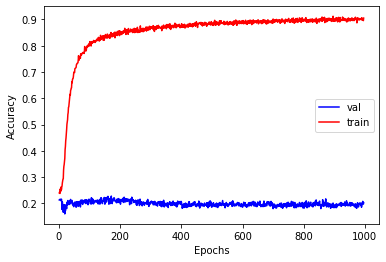

In [116]:
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe du score de validation du réseau Dense
plt.plot(np.arange(1 , len(acc_dense)+1, 1),
         val_acc_dense,
         label = 'val',
         color = 'blue')

# Courbe du score d'entrainement du réseau Dense
plt.plot(np.arange(1 , len(acc_dense)+1, 1),
         acc_dense,
         label = 'train',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()